In [1]:
from sklearn.datasets import load_boston
X, y=load_boston(return_X_y=True)

c:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
mod=KNeighborsRegressor().fit(X,y)

pipe=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=5))
])
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [3]:
# pipe.get_params()
mod=GridSearchCV(estimator=pipe,
                 param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                 cv=3
                 )
mod.fit(X,y)
import pandas as pd
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002135,0.001717,0.005846,0.005697,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001798,0.002542,0.004940,0.002290,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.000841,0.000629,0.001959,0.001901,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.002412,0.001456,0.005123,0.007246,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002430,0.002174,0.001341,0.001897,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001689,0.002388,0.003321,0.002348,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000998,0.001077,0.004460,0.002977,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000207,0.000215,0.000000,0.000000,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001006,0.001423,0.004423,0.001738,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001171,0.001657,0.003405,0.004816,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [4]:
pred=pipe.predict(X)

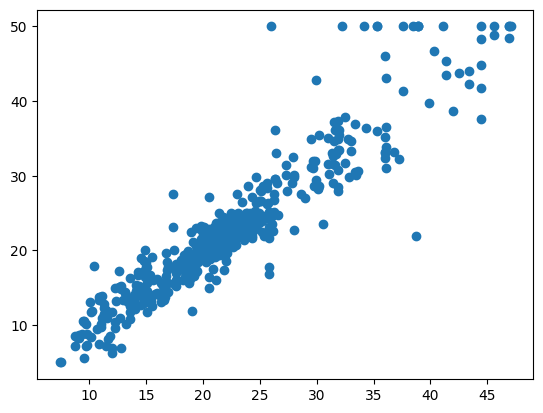

In [5]:
import matplotlib.pyplot as plt
plt.scatter(pred,y)

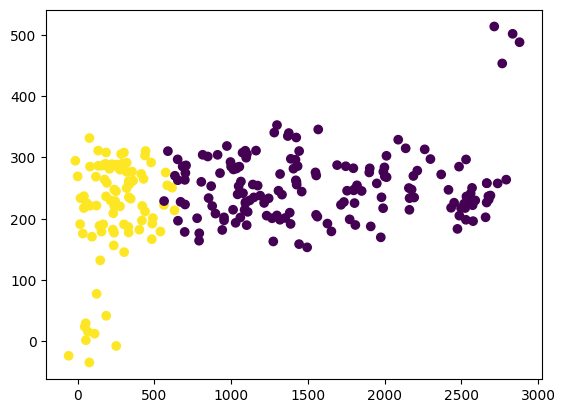

In [15]:
df=pd.read_csv('drawndata1.csv')
import matplotlib.pylab as plt
X=df[['x','y']].values
Y=df['z']=="a"
plt.scatter(X[:,0],X[:,1],c=y)

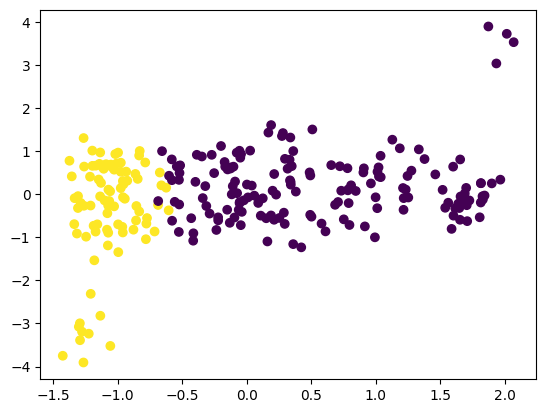

In [22]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
X_new=StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

c:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


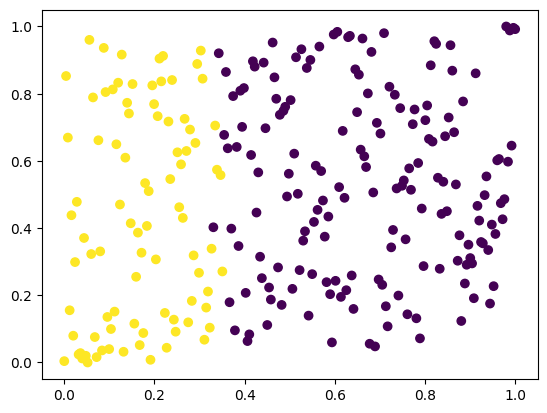

In [23]:
X_new=QuantileTransformer().fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

(array([ 74., 201., 186., 109., 112.,  79.,  54.,  41.,  28.,  26.,  18.,
         11.,  14.,  12.,   9.,   3.,   7.,   4.,   2.,   3.,   2.,   0.,
          2.,   0.,   0.,   0.,   1.,   1.,   0.,   1.]),
 array([-1.155993  , -0.90204698, -0.64810095, -0.39415493, -0.14020891,
         0.11373712,  0.36768314,  0.62162917,  0.87557519,  1.12952122,
         1.38346724,  1.63741326,  1.89135929,  2.14530531,  2.39925134,
         2.65319736,  2.90714339,  3.16108941,  3.41503543,  3.66898146,
         3.92292748,  4.17687351,  4.43081953,  4.68476556,  4.93871158,
         5.1926576 ,  5.44660363,  5.70054965,  5.95449568,  6.2084417 ,
         6.46238773]),
 <BarContainer object of 30 artists>)

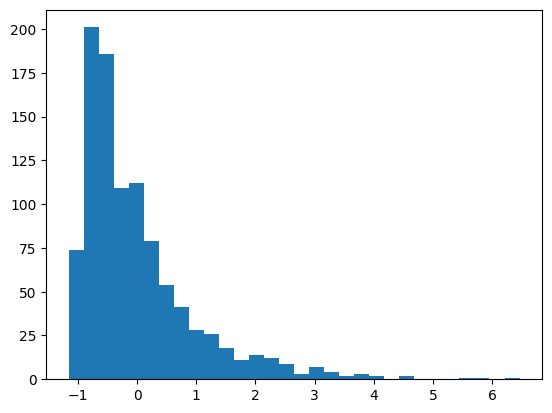

In [21]:
import numpy as np
x=np.random.exponential(10,(1000))+np.random.normal(0,1,(1000))
plt.hist((x-np.mean(x))/np.std(x),30)